<a href="https://colab.research.google.com/github/mohsenSarvariHero/PythonFirst/blob/main/Q14_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Re-import libraries after reset
import numpy as np

# Parameters for the distributions
n_days = 250  # Number of trading days
mu_sp500, sigma_sp500 = 0.001, 0.02  # Mean and standard deviation for S&P500
mu_nasdaq, sigma_nasdaq = 0.0015, 0.03  # Mean and standard deviation for NASDAQ

# Simulate daily returns
np.random.seed(42)  # For reproducibility
sp500_returns = np.random.normal(loc=mu_sp500, scale=sigma_sp500, size=n_days)
nasdaq_returns = np.random.normal(loc=mu_nasdaq, scale=sigma_nasdaq, size=n_days)

# Display a sample of the simulated data
sp500_sample = sp500_returns[:10]
nasdaq_sample = nasdaq_returns[:10]
sp500_sample, nasdaq_sample


(array([ 0.01093428, -0.00176529,  0.01395377,  0.0314606 , -0.00368307,
        -0.00368274,  0.03258426,  0.01634869, -0.00838949,  0.0118512 ]),
 array([-0.03632652,  0.02903586,  0.06516469,  0.03247396, -0.0440811 ,
        -0.01302702,  0.03950733, -0.01973008,  0.01481458,  0.02473902]))

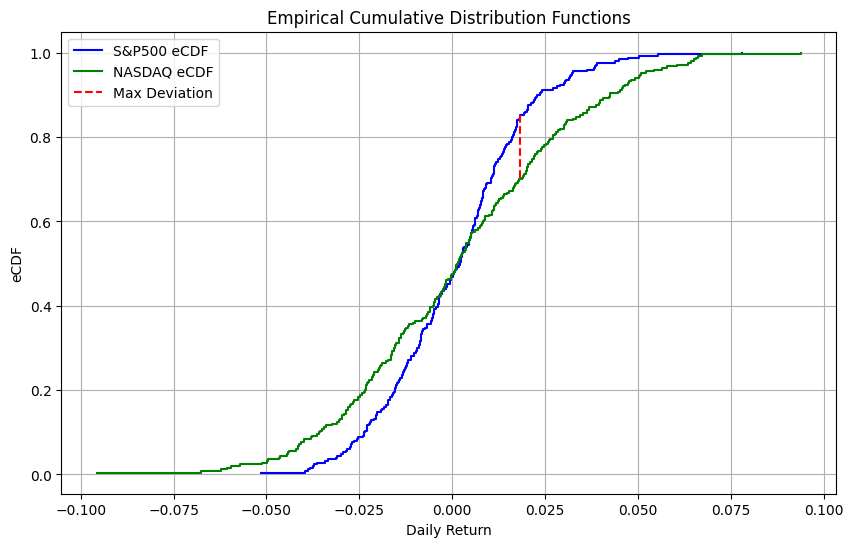

Kolmogorov-Smirnov Test Results:
KS Statistic: 0.1520
P-Value: 0.0061
Critical Value (alpha=0.05): 0.1215
Reject the null hypothesis: The distributions are significantly different.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# 1. Simulate Data
np.random.seed(42)  # For reproducibility
n = 250

# S&P500 daily returns
sp500_returns = np.random.normal(loc=0.001, scale=0.02, size=n)

# NASDAQ daily returns
nasdaq_returns = np.random.normal(loc=0.0015, scale=0.03, size=n)

# 2. Compute eCDFs
def compute_ecdf(data):
    """Compute empirical cumulative distribution function."""
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

sp500_x, sp500_y = compute_ecdf(sp500_returns)
nasdaq_x, nasdaq_y = compute_ecdf(nasdaq_returns)

# 3. Perform Kolmogorov-Smirnov Test
ks_statistic, p_value = ks_2samp(sp500_returns, nasdaq_returns)

# Critical value for KS test
alpha = 0.05
critical_value = np.sqrt(-0.5 * np.log(alpha / 2) * (2 / n))

# 4. Plot eCDFs
plt.figure(figsize=(10, 6))
plt.step(sp500_x, sp500_y, where='post', label='S&P500 eCDF', color='blue')
plt.step(nasdaq_x, nasdaq_y, where='post', label='NASDAQ eCDF', color='green')

# Highlight maximum deviation
max_deviation_x = sp500_x[np.argmax(np.abs(sp500_y - np.interp(sp500_x, nasdaq_x, nasdaq_y)))]
max_deviation_y1 = sp500_y[np.argmax(np.abs(sp500_y - np.interp(sp500_x, nasdaq_x, nasdaq_y)))]
max_deviation_y2 = np.interp(max_deviation_x, nasdaq_x, nasdaq_y)
plt.plot([max_deviation_x, max_deviation_x], [max_deviation_y1, max_deviation_y2], 'r--', label='Max Deviation')

plt.xlabel('Daily Return')
plt.ylabel('eCDF')
plt.title('Empirical Cumulative Distribution Functions')
plt.legend()
plt.grid()
plt.show()

# 5. Test Null Hypothesis
print("Kolmogorov-Smirnov Test Results:")
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Critical Value (alpha=0.05): {critical_value:.4f}")

if ks_statistic > critical_value:
    print("Reject the null hypothesis: The distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between distributions.")
